### Predicting Loan Approval Using Machine Learning

In [705]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Display all the columns of the dataframes
pd.pandas.set_option('display.max_columns',None)

In [708]:
dataset=pd.read_csv('loan_approval.csv')

In [710]:
dataset 

,income,credit_score,loan_amount,loan_term,employment_length,existing_debt,num_credit_lines,home_ownership,purpose,birth_year,monthly_rent_or_mortgage,has_default_last_7yrs,loan_approved
0,57450,600,25788,48,11,16569.26,9,Rent,Education,1979,1691,0,0
1,47926,647,30628,12,5,17333.25,8,Mortgage,Personal,1964,1278,0,0
2,59715,670,28411,12,1,23309.66,4,Other,Debt Consolidation,1954,1268,0,0
3,72845,707,12220,12,15,12695.63,9,Rent,Home Improvement,1995,1815,0,1
4,46487,751,23137,12,12,21292.12,9,Mortgage,Personal,1950,672,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,41340,664,43220,36,9,20701.67,6,Mortgage,Debt Consolidation,1988,1584,0,1
29996,71669,645,18304,36,15,29409.44,10,Mortgage,Personal,1979,2644,0,1
29997,42479,707,22036,36,15,28772.19,3,Other,Home Improvement,1958,924,0,1
29998,21614,590,27595,36,12,22624.43,5,Own,Personal,1956,2535,1,0


In [712]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   income                    30000 non-null  int64  
 1   credit_score              30000 non-null  int64  
 2   loan_amount               30000 non-null  int64  
 3   loan_term                 30000 non-null  int64  
 4   employment_length         30000 non-null  int64  
 5   existing_debt             30000 non-null  float64
 6   num_credit_lines          30000 non-null  int64  
 7   home_ownership            30000 non-null  object 
 8   purpose                   30000 non-null  object 
 9   birth_year                30000 non-null  int64  
 10  monthly_rent_or_mortgage  30000 non-null  int64  
 11  has_default_last_7yrs     30000 non-null  int64  
 12  loan_approved             30000 non-null  int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 3.0+ MB


In [714]:
dataset.isnull().sum()

income                      0
credit_score                0
loan_amount                 0
loan_term                   0
employment_length           0
existing_debt               0
num_credit_lines            0
home_ownership              0
purpose                     0
birth_year                  0
monthly_rent_or_mortgage    0
has_default_last_7yrs       0
loan_approved               0
dtype: int64

There are no null values in the dataset 

### EDA

 Categorical variables 

In [719]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']

In [721]:
len(categorical_features)

2

In [723]:
dataset[categorical_features].head()

,home_ownership,purpose
0,Rent,Education
1,Mortgage,Personal
2,Other,Debt Consolidation
3,Rent,Home Improvement
4,Mortgage,Personal


In [725]:
for feature in categorical_features:
    print(" The feature name is {} and the number of categories are {}".format(feature,len(dataset[feature].unique())))

 The feature name is home_ownership and the number of categories are 4
 The feature name is purpose and the number of categories are 5


In [727]:
# Print actual loan approval rates for each home ownership type
approval_rates=dataset.groupby("home_ownership")["loan_approved"].mean()*100
print("Loan Approval Rates by Home Ownership:\n", approval_rates)

Loan Approval Rates by Home Ownership:
 home_ownership
Mortgage    75.581241
Other       75.713509
Own         75.908851
Rent        76.365812
Name: loan_approved, dtype: float64


In [729]:
approval_rates_purpose=dataset.groupby("purpose")["loan_approved"].mean()*100
print("\nLoan Approval Rates by Loan Purpose:\n", approval_rates_purpose)



Loan Approval Rates by Loan Purpose:
 purpose
Business              75.656364
Debt Consolidation    76.089918
Education             76.587816
Home Improvement      75.486251
Personal              75.627720
Name: loan_approved, dtype: float64


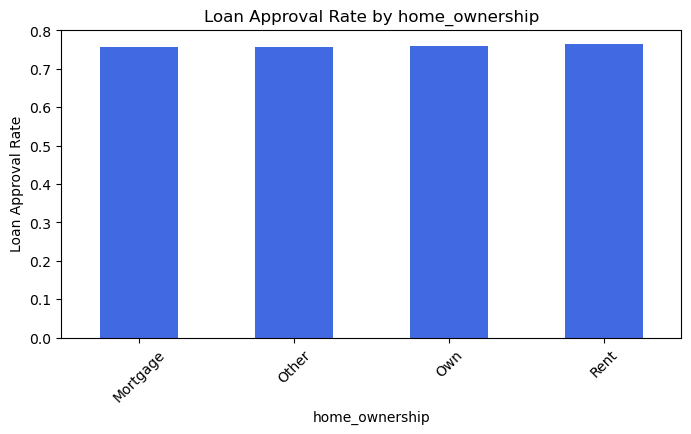

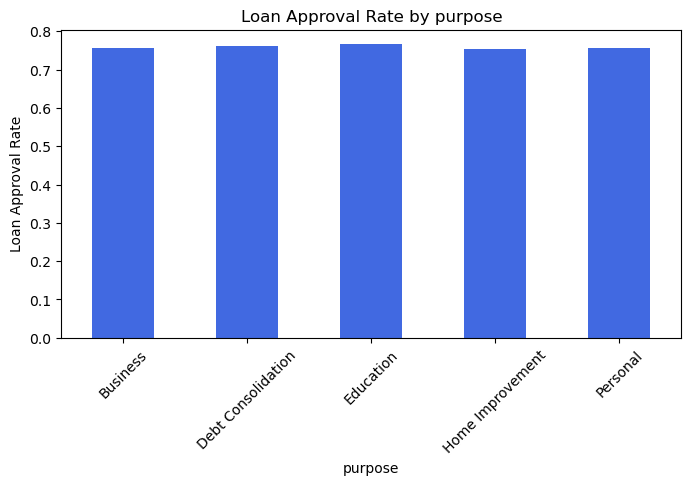

In [731]:
# Copy dataset to avoid modifying original data
data=dataset.copy()
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    data.groupby(feature)['loan_approved'].mean().plot(kind='bar', color='royalblue')
    plt.xlabel(feature)
    plt.ylabel('Loan Approval Rate')
    plt.title(f"Loan Approval Rate by {feature}")
    plt.xticks(rotation=45)
    plt.show()

1) Loan Approval is a Binary Variable: The target variable (loan_approved) is either 0 (Not Approved) or 1 (Approved).

2) Mean Represents Approval Probability: Since values are 0 or 1, the mean approval rate in each category shows the proportion of approved loans.

3) Home Ownership & Loan Approval: Approval rates are fairly consistent across all home ownership types, with only minor differences.

4) Renters Have Slightly Higher Approval Rates: Renters (76.37%) have a marginally higher approval rate than homeowners and mortgage holders.

5) Home Ownership Does Not Strongly Affect Loan Approval: Since all categories fall within a narrow range (~0.75 to 0.76), home ownership is not a significant factor in determining loan approval.

1) Education Loans Have the Highest Approval Rate (76.59%): Lenders may view education as a worthwhile investment, leading to slightly higher approval rates.

2) Home Improvement Loans Have the Lowest Approval Rate (75.49%): These loans are approved less frequently compared to other categories.

3) Other Loan Types Fall in Between:
    Debt Consolidation, Business, and Personal loans have approval rates around 75.6%–76%.

4) Loan Purpose Does Not Strongly Influence Approval: Since all categories have similar approval rates, loan purpose is not a major factor in determining loan approval.

NUMERICAL FEATURES

In [736]:
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtype!='O']

In [738]:
print(len(numerical_features))
dataset[numerical_features].head()

11


,income,credit_score,loan_amount,loan_term,employment_length,existing_debt,num_credit_lines,birth_year,monthly_rent_or_mortgage,has_default_last_7yrs,loan_approved
0,57450,600,25788,48,11,16569.26,9,1979,1691,0,0
1,47926,647,30628,12,5,17333.25,8,1964,1278,0,0
2,59715,670,28411,12,1,23309.66,4,1954,1268,0,0
3,72845,707,12220,12,15,12695.63,9,1995,1815,0,1
4,46487,751,23137,12,12,21292.12,9,1950,672,0,1


<Figure size 1200x800 with 0 Axes>

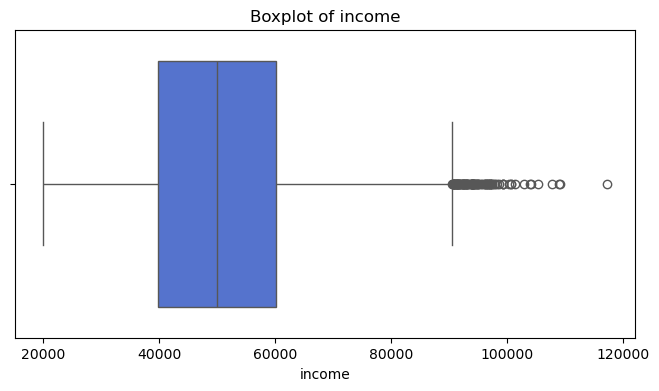

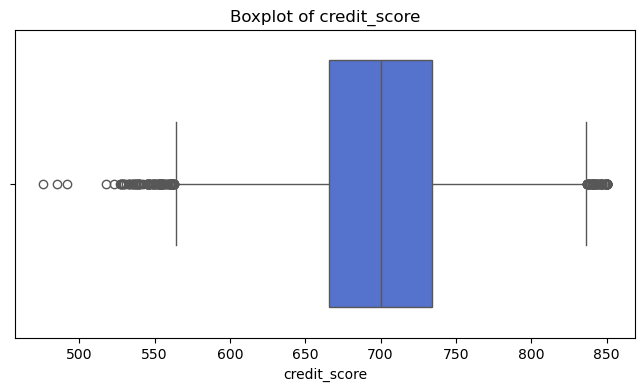

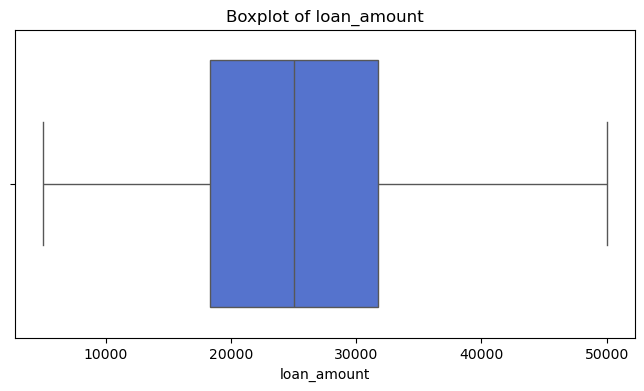

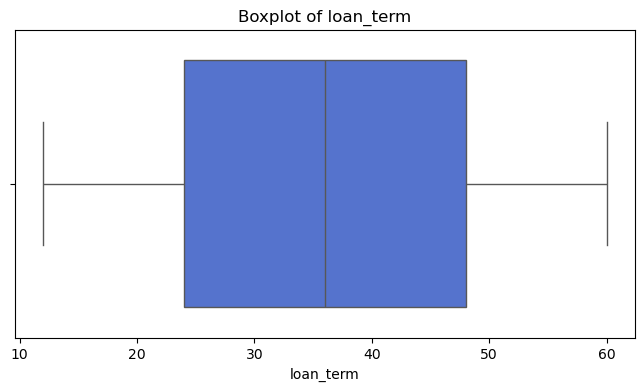

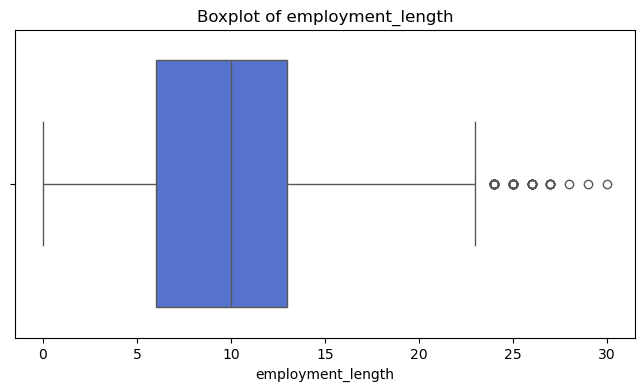

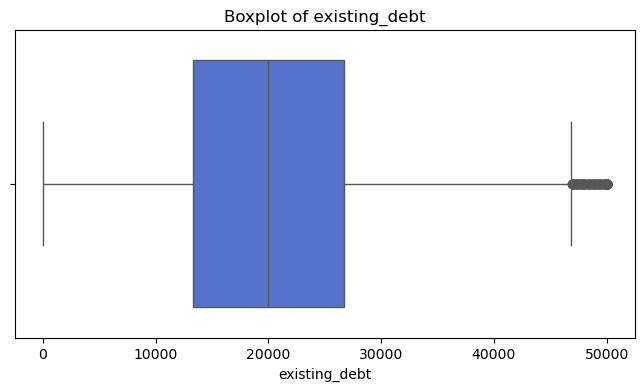

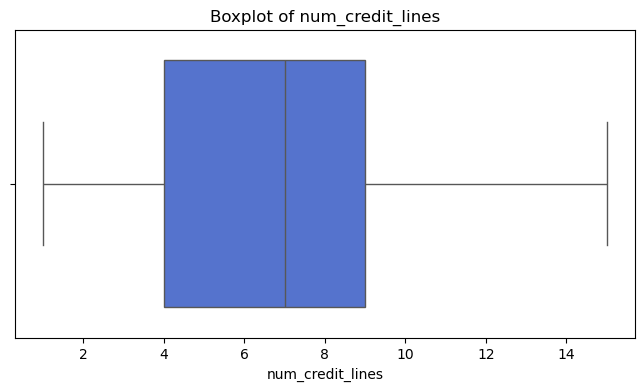

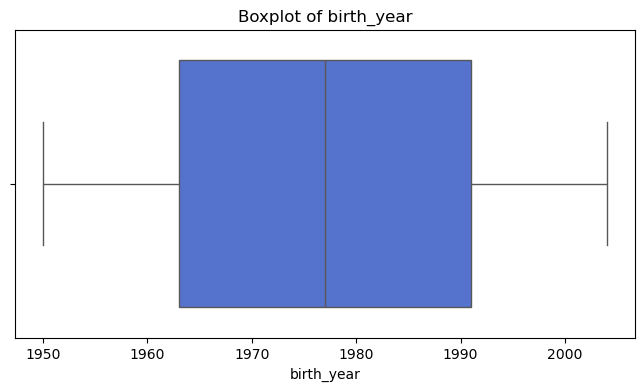

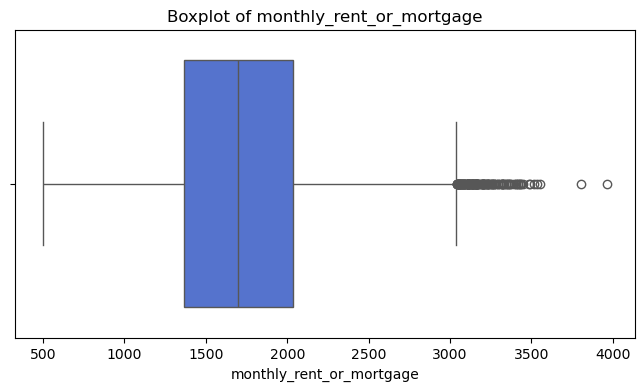

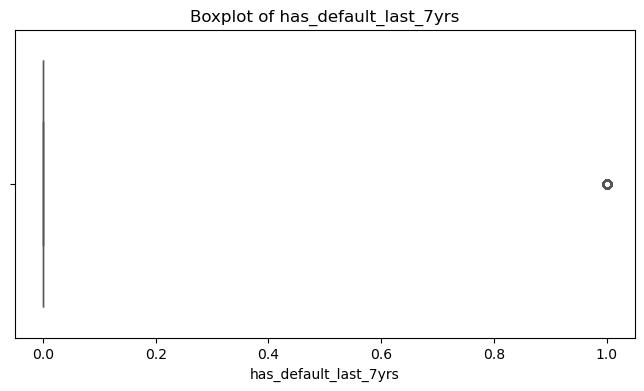

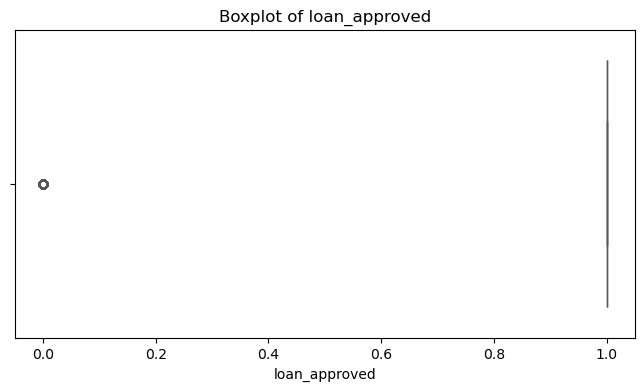

In [740]:
# Create boxplots for all numerical features
plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=dataset[feature], color="royalblue")
    plt.title(f"Boxplot of {feature}")
    plt.show()
    

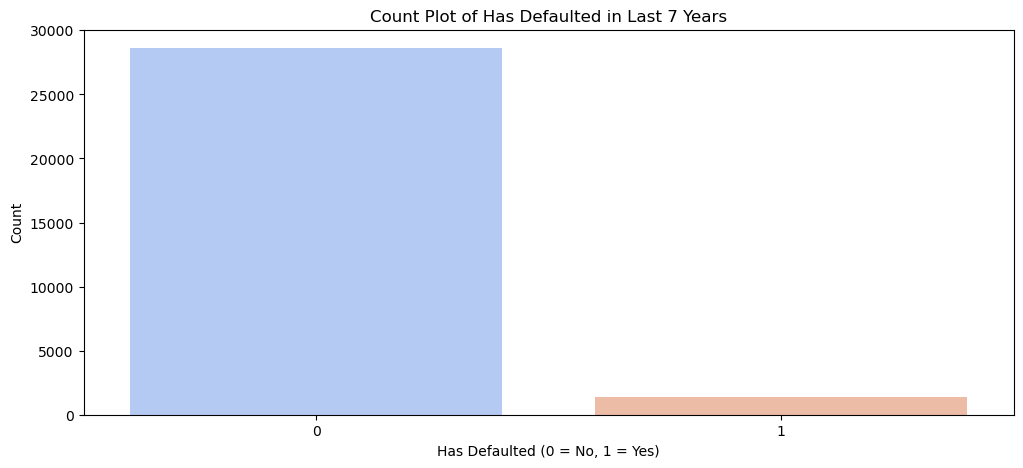

In [741]:
# Set figure size
plt.figure(figsize=(12, 5))

# Count plot for "has_default_last_7yrs"
sns.countplot(x=dataset["has_default_last_7yrs"], hue=dataset["has_default_last_7yrs"], palette="coolwarm", legend=False)
plt.title("Count Plot of Has Defaulted in Last 7 Years")
plt.xlabel("Has Defaulted (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

Income:

Most applicants have incomes ranging between 40,000 and 60,000.

A few outliers exist above $100,000.

Higher income applicants are more likely to be approved.

Credit Score:

Most credit scores fall between 650 and 750.

Some applicants have extremely low credit scores (below 500) or very high scores (800+).

Higher credit scores improve loan approval chances.

Loan Amount:

The majority of loans are between 10,000 and 35,000.

A few extreme cases exceed $50,000, which may increase rejection rates.

Higher loan amounts are associated with lower approval rates.

Loan Term:

Loan terms are typically between 24 and 60 months.

No extreme outliers, suggesting most applicants fall within standard lending periods.

Loan term does not strongly impact approval.

Employment Length:

Most applicants have employment experience between 5 and 15 years.

Some outliers include applicants with 0 years (unemployed) and 30+ years.

Longer employment history slightly improves approval chances.

Existing Debt:

Debt levels vary widely, but most are between 10,000 and 30,000.

Some applicants have very high debt (above $50,000), which increases rejection risks.

Higher existing debt reduces approval probability.

Number of Credit Lines:

The majority of applicants have between 4 and 10 credit lines.

A few outliers have more than 15 credit lines.

Credit line count does not strongly impact loan approval.

Monthly Rent/Mortgage:

Rent/mortgage payments typically range between 1,200 and 2,500.

Some applicants have extremely high payments (above $3,500), which may reduce approval chances.

Higher rent/mortgage payments slightly increase rejection rates.









Statistical analysis 

In [746]:
# Display summary statistics for numerical features
print("\nSummary Statistics for Numerical Features:\n")
print(dataset[numerical_features].describe())
print("\nChecking for Potential Outliers:\n")
for feature in numerical_features:
    print(f"{feature}: Min={dataset[feature].min()}, Max={dataset[feature].max()}")



Summary Statistics for Numerical Features:

              income  credit_score   loan_amount     loan_term  \
count   30000.000000  30000.000000  30000.000000  30000.000000   
mean    50123.081967    699.499233  25108.312867     35.894800   
std     14673.226191     50.206795   9759.059073     16.967266   
min     20000.000000    476.000000   5000.000000     12.000000   
25%     39841.500000    666.000000  18328.750000     24.000000   
50%     50027.500000    700.000000  25044.000000     36.000000   
75%     60123.250000    734.000000  31748.250000     48.000000   
max    117186.000000    850.000000  50000.000000     60.000000   

       employment_length  existing_debt  num_credit_lines    birth_year  \
count       30000.000000   30000.000000      30000.000000  30000.000000   
mean            9.571900   20119.741999          6.542033   1976.963133   
std             4.859213    9803.476549          2.922063     15.849562   
min             0.000000       0.000000          1.000000   

key finding on outliers, Need log transformation or extremevalues mapping 
Income, Loan Amount, Existing Debt, Monthly Rent/Mortgage
Features with normal distribution 
Credit Score, Loan Term, Birth Year

Correlation table 

Correlation of Numerical Features with Loan Approval:

loan_approved               1.000000
income                      0.456358
credit_score                0.173772
employment_length           0.048563
birth_year                  0.003522
num_credit_lines           -0.000694
loan_term                  -0.042738
existing_debt              -0.058018
monthly_rent_or_mortgage   -0.061691
loan_amount                -0.214816
has_default_last_7yrs      -0.346092
Name: loan_approved, dtype: float64


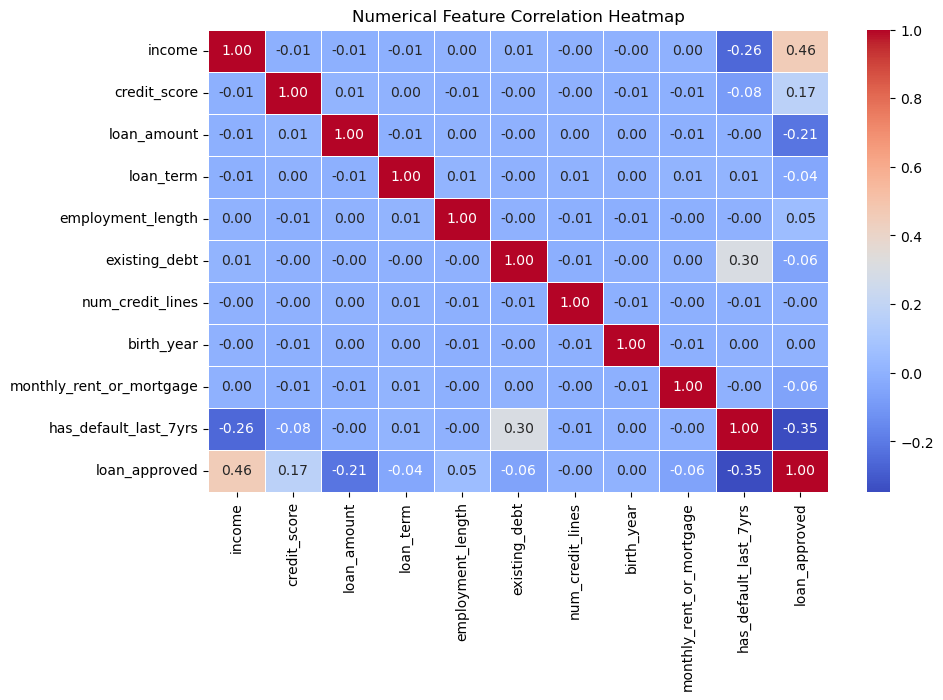

In [750]:
# Calculate correlation of numerical features with loan approval
correlation = dataset[numerical_features].corr()["loan_approved"].sort_values(ascending=False)
print("Correlation of Numerical Features with Loan Approval:\n")
print(correlation)
plt.figure(figsize=(10, 6))
sns.heatmap(dataset[numerical_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Numerical Feature Correlation Heatmap")
plt.show()


1) Income

Strong Positive Correlation - Higher income leads to higher loan approval rates.

2) Credit Score

Weak Positive Correlation - Higher credit scores are slightly associated with increased approval.

3) Employment Length

Very Weak Correlation - Has minimal impact on loan approval decisions.

4) Loan Amount

Moderate Negative Correlation - Larger loan amounts decrease the likelihood of approval.

5) Existing Debt

Weak Negative Correlation - Higher existing debt slightly reduces loan approval chances.

6) Monthly Rent/Mortgage

Weak Negative Correlation - Higher rent/mortgage payments slightly increase rejection rates.

7) Loan Term

Very Weak Negative Correlation - Loan term has almost no effect on approval.

8) Has Defaulted in Last 7 Years

Strong Negative Correlation - Past defaults significantly lower loan approval chances.









Applying Log Transformation to skewed features 

In [754]:
features_to_log=["income", "loan_amount", "existing_debt", "monthly_rent_or_mortgage"]
for feature in features_to_log:
    dataset[feature]=np.log1p(dataset[feature])  # log1p avoids log(0) issues

print("Log transformation applied to:", features_to_log)


Log transformation applied to: ['income', 'loan_amount', 'existing_debt', 'monthly_rent_or_mortgage']


In [756]:
# Define outlier caps (based on 99th percentile)
caps={
    "income": dataset["income"].quantile(0.99),
    "loan_amount": dataset["loan_amount"].quantile(0.99),
    "existing_debt": dataset["existing_debt"].quantile(0.99),
    "monthly_rent_or_mortgage": dataset["monthly_rent_or_mortgage"].quantile(0.99),
}

for feature, cap in caps.items():
    dataset[feature]=np.where(dataset[feature] > cap, cap, dataset[feature])

print("Outliers capped for:", list(caps.keys()))

Outliers capped for: ['income', 'loan_amount', 'existing_debt', 'monthly_rent_or_mortgage']


### Feature Engineering 

In [759]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']

In [761]:
len(categorical_features)

2

In [763]:
dataset[categorical_features].head()

,home_ownership,purpose
0,Rent,Education
1,Mortgage,Personal
2,Other,Debt Consolidation
3,Rent,Home Improvement
4,Mortgage,Personal


In [765]:
dataset.home_ownership.unique()

array(['Rent', 'Mortgage', 'Other', 'Own'], dtype=object)

In [767]:
dataset.purpose.unique()

array(['Education', 'Personal', 'Debt Consolidation', 'Home Improvement',
       'Business'], dtype=object)

Creating New Features  


In [770]:
#Debt-to-Income Ratio
dataset["debt_to_income_ratio"]=dataset["existing_debt"] / dataset["income"]

In [772]:
#Loan-to-Income Ratio
dataset["loan_to_income_ratio"]=dataset["loan_amount"] / dataset["income"]

In [774]:
#Debt-Free Indicator (1 if existing debt = 0)
dataset["debt_free"]=(dataset["existing_debt"]==0).astype(int)

In [776]:
#Credit Utilization Ratio
dataset["credit_utilization"]=dataset["existing_debt"] / dataset["num_credit_lines"]

In [778]:
#High Credit Score Indicator (1 if credit_score > 620)
dataset["high_credit_score"]=(dataset["credit_score"] > 620).astype(int)

In [780]:
#Short-Term Loan Indicator (1 if loan term <= 24 months)
dataset["short_term_loan"]=(dataset["loan_term"] <= 24).astype(int)

In [782]:
#Applicant Age
dataset["age"]=2025 - dataset["birth_year"]

In [784]:
#Young Borrower Indicator (1 if age < 25)
dataset["young_borrower"]=(dataset["age"] < 25).astype(int)

In [786]:
#Retirement Age Borrower Indicator (1 if age > 60)
dataset["retirement_borrower"]=(dataset["age"] > 60).astype(int)

In [788]:
print("New Features Created Successfully!")
print("Updated dataset shape:", dataset.shape)
dataset.drop(columns=["birth_year"], inplace=True)
dataset.head()

New Features Created Successfully!
Updated dataset shape: (30000, 22)


,income,credit_score,loan_amount,loan_term,employment_length,existing_debt,num_credit_lines,home_ownership,purpose,monthly_rent_or_mortgage,has_default_last_7yrs,loan_approved,debt_to_income_ratio,loan_to_income_ratio,debt_free,credit_utilization,high_credit_score,short_term_loan,age,young_borrower,retirement_borrower
0,10.958688,600,10.157703,48,11,9.715365,9,Rent,Education,7.433667,0,0,0.886545,0.926909,0,1.079485,0,0,46,0,0
1,10.777434,647,10.329703,12,5,9.760440,8,Mortgage,Personal,7.153834,0,0,0.905637,0.958457,0,1.220055,1,1,61,0,1
2,10.997355,670,10.254567,12,1,10.056666,4,Other,Debt Consolidation,7.145984,0,0,0.914462,0.932458,0,2.514167,1,1,71,0,1
3,11.196103,707,9.410911,12,15,9.449092,9,Rent,Home Improvement,7.504392,0,1,0.843963,0.840552,0,1.049899,1,1,30,0,0
4,10.746949,751,10.049232,12,12,9.966139,9,Mortgage,Personal,6.511745,0,1,0.927346,0.935078,0,1.107349,1,1,75,0,1


1) Debt-to-Income Ratio: Measures financial burden by comparing existing debt to income.

2) Loan-to-Income Ratio: Indicates how much of the applicant’s income is allocated to the requested loan.

3) Debt-Free Indicator: 1 if the applicant has no existing debt, 0 otherwise.

4) Credit Utilization: Ratio of the number of credit lines to existing debt, showing credit dependency.

5) High Credit Score: 1 if the credit score exceeds 750, 0 otherwise.

6) Short-Term Loan: 1 if the loan term is 24 months or less, 0 otherwise.

7) Age: Applicant’s current age derived from their birth year.

8) Young Borrower: 1 if the applicant is under 25 years old, 0 otherwise.

9) Retirement Borrower: 1 if the applicant is over 60 years old, 0 otherwise.

In [791]:
# Compute correlation of new features with loan approval
new_features=["debt_to_income_ratio", "loan_to_income_ratio", "debt_free",
                 "credit_utilization","high_credit_score", "short_term_loan", "age", "young_borrower", "retirement_borrower"]

correlation_new_features=dataset[new_features + ["loan_approved"]].corr()["loan_approved"].sort_values(ascending=False)

print("Correlation of New Features with Loan Approval:\n")
print(correlation_new_features)

Correlation of New Features with Loan Approval:

loan_approved           1.000000
high_credit_score       0.151183
debt_free               0.042751
short_term_loan         0.021002
young_borrower          0.005272
retirement_borrower     0.003164
age                    -0.003522
credit_utilization     -0.014165
debt_to_income_ratio   -0.141104
loan_to_income_ratio   -0.436485
Name: loan_approved, dtype: float64


1) High Credit Score (0.15, Positive): A moderate positive correlation, indicating that applicants with high credit scores have a better chance of loan approval.

2) Debt-Free Indicator (0.04, Positive): A weak positive impact, suggesting that applicants with no existing debt have slightly better approval chances.

3) Short-Term Loan (0.02, Positive): Very minimal impact, indicating that loan term length does not significantly influence approval.

4) Young Borrower (0.005, Negligible Positive): No meaningful impact, meaning age under 25 does not strongly affect approval.

5) Retirement Borrower (0.003, Negligible Positive): Similar to young borrowers, age above 60 has no significant effect on loan approval.

6) Age (-0.003, Negligible Negative): Practically no correlation between age and loan approval.

7) Credit Utilization (-0.01, Weak Negative): Slight negative impact, meaning higher usage of credit has a very small effect on loan approval.

8) Debt-to-Income Ratio (-0.14, Negative): A moderate negative correlation, suggesting that applicants with higher debt compared to their income are less likely to get approved.

9) Loan-to-Income Ratio (-0.43, Strong Negative): The most influential feature, showing that higher loan requests relative to income significantly reduce approval chances.

Dropping the features which are not important 

In [795]:
features_to_drop=["short_term_loan", "young_borrower", "retirement_borrower", "credit_utilization"]

# Drop the selected features
dataset.drop(columns=features_to_drop, inplace=True)

print("Dropped weak features successfully")
print("Updated dataset shape:", dataset.shape)

Dropped weak features successfully
Updated dataset shape: (30000, 17)


In [797]:
dataset.head()

,income,credit_score,loan_amount,loan_term,employment_length,existing_debt,num_credit_lines,home_ownership,purpose,monthly_rent_or_mortgage,has_default_last_7yrs,loan_approved,debt_to_income_ratio,loan_to_income_ratio,debt_free,high_credit_score,age
0,10.958688,600,10.157703,48,11,9.715365,9,Rent,Education,7.433667,0,0,0.886545,0.926909,0,0,46
1,10.777434,647,10.329703,12,5,9.760440,8,Mortgage,Personal,7.153834,0,0,0.905637,0.958457,0,1,61
2,10.997355,670,10.254567,12,1,10.056666,4,Other,Debt Consolidation,7.145984,0,0,0.914462,0.932458,0,1,71
3,11.196103,707,9.410911,12,15,9.449092,9,Rent,Home Improvement,7.504392,0,1,0.843963,0.840552,0,1,30
4,10.746949,751,10.049232,12,12,9.966139,9,Mortgage,Personal,6.511745,0,1,0.927346,0.935078,0,1,75


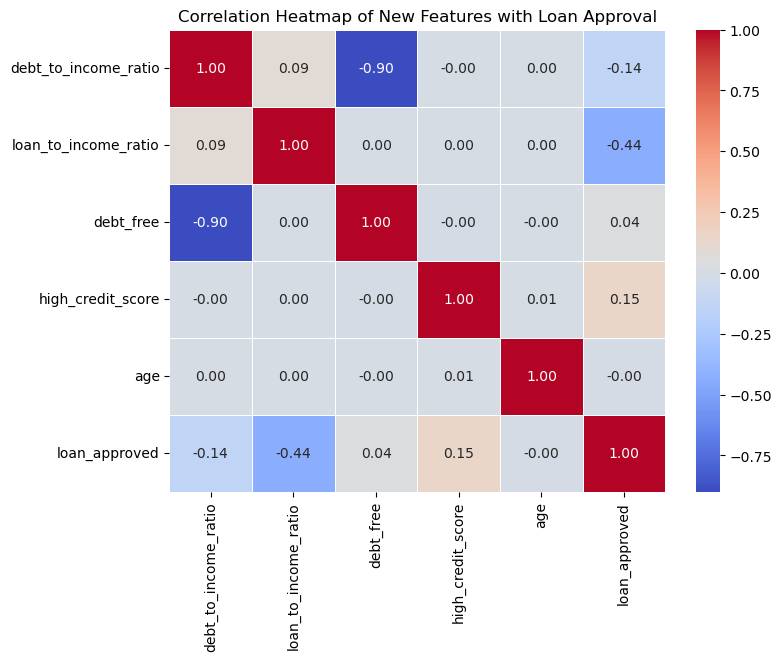

In [799]:
new_features=["debt_to_income_ratio", "loan_to_income_ratio", "debt_free",
                 "high_credit_score", "age"]
corr_matrix=dataset[new_features + ["loan_approved"]].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of New Features with Loan Approval")
plt.show()


1) Loan-to-Income Ratio (-0.44, Negative): A strong negative correlation, meaning applicants requesting larger loans relative to their income are less likely to get approved.

2) Debt-to-Income Ratio (-0.14, Negative): A moderate negative correlation, suggesting that higher existing debt reduces loan approval chances.

3) High Credit Score (0.15, Positive): A moderate positive correlation, indicating that applicants with high credit scores have a better chance of loan approval.

4) Debt-Free Indicator (0.04, Positive): A weak positive impact, suggesting that applicants with no existing debt have slightly better approval chances.

5) Age (-0.00, No Impact): No meaningful correlation, showing that age does not significantly affect loan approval.









Box Plot Analysis 

<Figure size 1200x800 with 0 Axes>

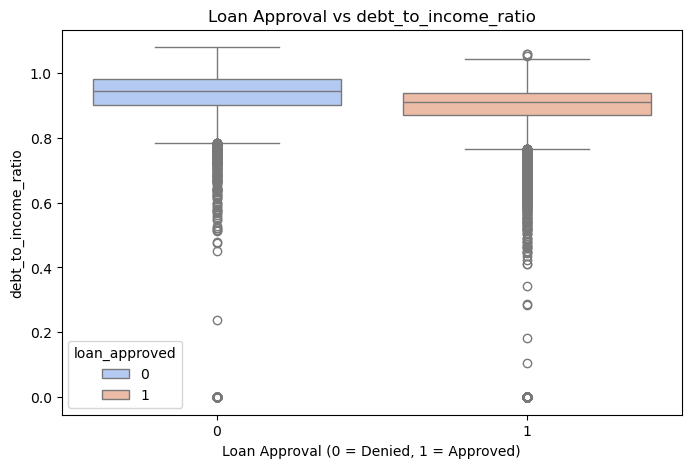

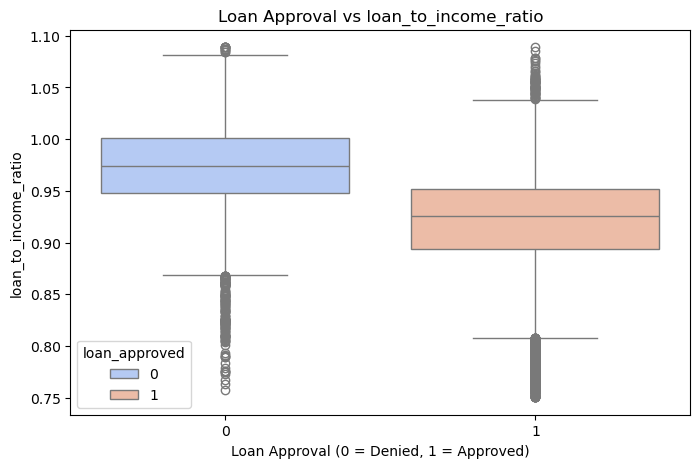

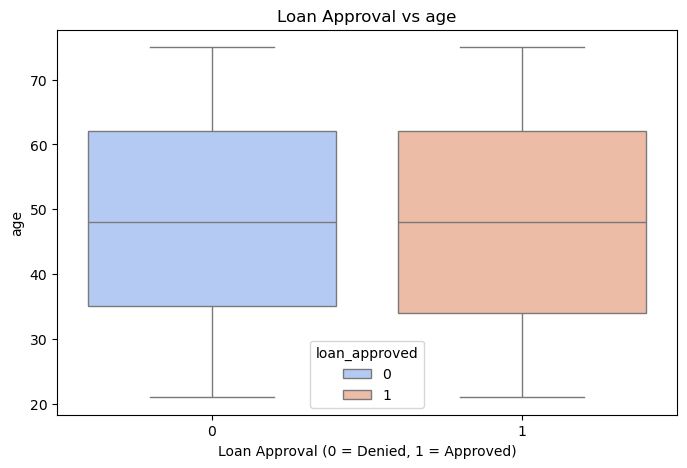

In [803]:
# Continuous Features
continuous_features = ["debt_to_income_ratio", "loan_to_income_ratio", "age"]

plt.figure(figsize=(12, 8))
for feature in continuous_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=dataset["loan_approved"], y=dataset[feature],hue=dataset["loan_approved"], palette="coolwarm")
    plt.title(f"Loan Approval vs {feature}")
    plt.xlabel("Loan Approval (0 = Denied, 1 = Approved)")
    plt.ylabel(feature)
    plt.show()


<Figure size 1200x500 with 0 Axes>

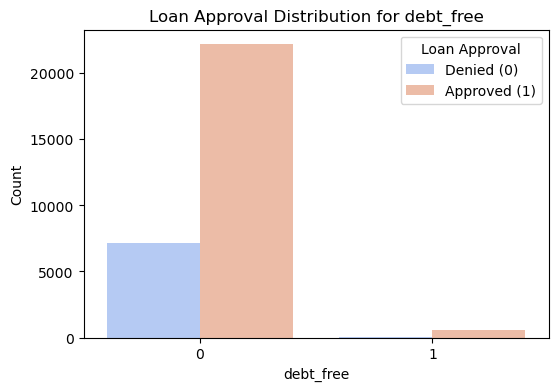

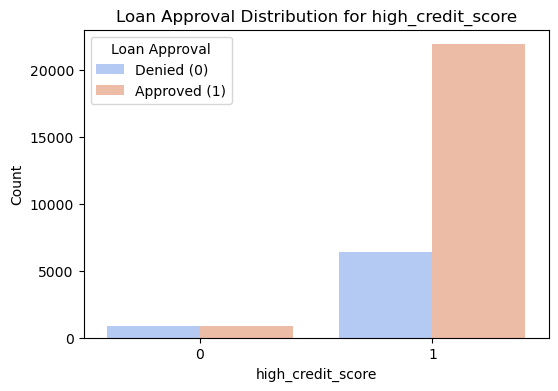

In [805]:
# Binary Features
binary_features = ["debt_free", "high_credit_score"]

plt.figure(figsize=(12, 5))
for feature in binary_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=dataset[feature], hue=dataset["loan_approved"], palette="coolwarm")
    plt.title(f"Loan Approval Distribution for {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title="Loan Approval", labels=["Denied (0)", "Approved (1)"])
    plt.show()

1) Loan-to-Income Ratio (−0.44, Negative): A strong negative correlation, meaning higher loan requests relative to income reduce approval chances.

2) Debt-to-Income Ratio (−0.14, Negative): A moderate negative correlation, indicating that applicants with higher debt burdens are less likely to get approved.

3) High Credit Score (0.15, Positive): A moderate positive correlation, showing that higher credit scores improve approval chances.

4) Debt-Free Indicator (0.04, Positive): A weak positive impact, suggesting that applicants with no existing debt have slightly better approval chances.

5) Age (−0.003, Negligible Negative): No meaningful impact, meaning age does not significantly affect approval rates.


### One Hot Encoding 

In [809]:
dataset_encoded=dataset.copy()

# Define categorical features
categorical_features=["home_ownership", "purpose"]

dataset_encoded=pd.get_dummies(dataset_encoded, columns=categorical_features, drop_first=True)

for feature in categorical_features:
    for col in dataset_encoded.columns:
        if feature in col:  # Apply only to one-hot encoded categorical features
            dataset_encoded[col]=dataset_encoded[col].astype(int)

print("One-Hot Encoding applied successfully")
print("Updated dataset shape:", dataset_encoded.shape)
dataset_encoded.head()

One-Hot Encoding applied successfully
Updated dataset shape: (30000, 22)


,income,credit_score,loan_amount,loan_term,employment_length,existing_debt,num_credit_lines,monthly_rent_or_mortgage,has_default_last_7yrs,loan_approved,debt_to_income_ratio,loan_to_income_ratio,debt_free,high_credit_score,age,home_ownership_Other,home_ownership_Own,home_ownership_Rent,purpose_Debt Consolidation,purpose_Education,purpose_Home Improvement,purpose_Personal
0,10.958688,600,10.157703,48,11,9.715365,9,7.433667,0,0,0.886545,0.926909,0,0,46,0,0,1,0,1,0,0
1,10.777434,647,10.329703,12,5,9.760440,8,7.153834,0,0,0.905637,0.958457,0,1,61,0,0,0,0,0,0,1
2,10.997355,670,10.254567,12,1,10.056666,4,7.145984,0,0,0.914462,0.932458,0,1,71,1,0,0,1,0,0,0
3,11.196103,707,9.410911,12,15,9.449092,9,7.504392,0,1,0.843963,0.840552,0,1,30,0,0,1,0,0,1,0
4,10.746949,751,10.049232,12,12,9.966139,9,6.511745,0,1,0.927346,0.935078,0,1,75,0,0,0,0,0,0,1


In [811]:
from sklearn.preprocessing import StandardScaler

# Define numerical features to scale (excluding categorical one-hot encoded features)
numerical_features=["income", "credit_score", "loan_amount", "loan_term", 
                      "employment_length", "existing_debt", "num_credit_lines",
                      "monthly_rent_or_mortgage", "debt_to_income_ratio", 
                      "loan_to_income_ratio", "age"]

scaler=StandardScaler()

dataset_encoded[numerical_features]=scaler.fit_transform(dataset_encoded[numerical_features])

print("Feature Scaling applied successfully")
dataset_encoded.head()

Feature Scaling applied successfully


,income,credit_score,loan_amount,loan_term,employment_length,existing_debt,num_credit_lines,monthly_rent_or_mortgage,has_default_last_7yrs,loan_approved,debt_to_income_ratio,loan_to_income_ratio,debt_free,high_credit_score,age,home_ownership_Other,home_ownership_Own,home_ownership_Rent,purpose_Debt Consolidation,purpose_Education,purpose_Home Improvement,purpose_Personal
0,0.579661,-1.981821,0.257688,0.713456,0.293900,0.097180,0.841189,0.130309,0,0,-0.011044,-0.101166,0,0,-0.128515,0,0,1,0,1,0,0
1,0.010012,-1.045677,0.618929,-1.408312,-0.940888,0.125619,0.498959,-0.726445,0,0,0.116488,0.499169,0,1,0.817900,0,0,0,0,0,0,1
2,0.701186,-0.587564,0.461125,-1.408312,-1.764081,0.312512,-0.869959,-0.750477,0,0,0.175441,0.004425,0,1,1.448842,1,0,0,1,0,0,0
3,1.325816,0.149400,-1.310761,-1.408312,1.117093,-0.070815,0.841189,0.346845,0,1,-0.295483,-1.744471,0,1,-1.138023,0,0,1,0,0,1,0
4,-0.085796,1.025790,0.029870,-1.408312,0.499698,0.255398,0.841189,-2.692304,0,1,0.261502,0.054282,0,1,1.701219,0,0,0,0,0,0,1


1) One-Hot Encoding (OHE):

Categorical variables like home_ownership and purpose cannot be used directly in models.

We convert them into numerical binary columns (0 or 1) using one-hot encoding to allow the model to process them.

We used drop_first=True to avoid multicollinearity, meaning we remove one category to prevent redundant information.

2) Feature Scaling (Standardization):

Numerical features like income, credit_score, loan_amount, etc., have different scales, which can bias the model towards larger values.

We used StandardScaler to scale all numerical values to have a mean of 0 and a standard deviation of 1, making the model training more stable and efficient.

3) Ensuring Binary Representation for One-Hot Encoding:

After applying one-hot encoding, the new categorical columns were stored as floating-point values.

We converted them to integer format (0/1) to make them consistent with binary representation and improve model efficiency.

Checking for data imbalance 

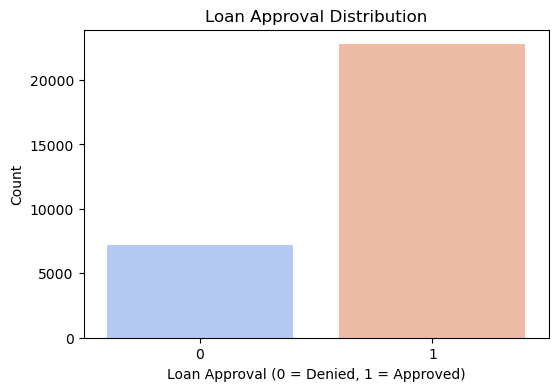

Loan Approval Distribution (%):
 loan_approved
1    75.893333
0    24.106667
Name: proportion, dtype: float64


In [815]:
plt.figure(figsize=(6, 4))
sns.countplot(x="loan_approved", data=dataset, hue="loan_approved", palette="coolwarm", legend=False)
plt.title("Loan Approval Distribution")
plt.xlabel("Loan Approval (0 = Denied, 1 = Approved)")
plt.ylabel("Count")
plt.show()

approval_counts = dataset["loan_approved"].value_counts(normalize=True) * 100
print("Loan Approval Distribution (%):\n", approval_counts)

75.89% of applicants were approved while 24.11% were denied, indicating an imbalanced dataset.

## Model Training 

In [819]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from collections import Counter

In [821]:
# Define features and target variable
X=dataset_encoded.drop(columns=["loan_approved"])  # Independent variables
y=dataset_encoded["loan_approved"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data split successfully")
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)

Data split successfully
Training Set Shape: (24000, 21) (24000,)
Testing Set Shape: (6000, 21) (6000,)


In [823]:
# Display class distribution before SMOTE
print("Class Distribution Before SMOTE:", Counter(y_train))

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class Distribution After SMOTE:", Counter(y_train_resampled))

Class Distribution Before SMOTE: Counter({1: 18214, 0: 5786})
Class Distribution After SMOTE: Counter({1: 18214, 0: 18214})


In [825]:
# Define numerical and categorical features
numerical_vars = [
    "income", "credit_score", "loan_amount", "loan_term", 
    "employment_length", "existing_debt", "num_credit_lines",
    "monthly_rent_or_mortgage", "debt_to_income_ratio",
    "loan_to_income_ratio", "age"
]

categorical_vars = [
    "home_ownership_Other", "home_ownership_Own", "home_ownership_Rent",
    "purpose_Debt Consolidation", "purpose_Education", "purpose_Home Improvement", "purpose_Personal"
]

num_pipeline = Pipeline([
    ('scaler', StandardScaler())  
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_vars),  
    ('cat', cat_pipeline, categorical_vars)
])

print("Preprocessing pipeline created successfully")


Preprocessing pipeline created successfully


In [827]:
from sklearn import set_config

# Enable pipeline visualization
set_config(display="diagram")

print(" Logistic Regression Pipeline")
display(logreg_pipeline)

print(" Random Forest Pipeline")
display(rf_pipeline)

 Logistic Regression Pipeline


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['income', 'credit_score',
                                                   'loan_amount', 'loan_term',
                                                   'employment_length',
                                                   'existing_debt',
                                                   'num_credit_lines',
                                                   'monthly_rent_or_mortgage',
                                                   'debt_to_income_ratio',
                                                   'loan_to_income_ratio',
                                                   'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['home_ownership_Other',
                                                   'home_ownership_Own',
                                                   'home_ownership_Rent',
                                                   'purpose_Debt Consolidation',
                                                   'purpose_Education',
                                                   'purpose_Home Improvement',
                                                   'purpose_Personal'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

 Random Forest Pipeline


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['income', 'credit_score',
                                                   'loan_amount', 'loan_term',
                                                   'employment_length',
                                                   'existing_debt',
                                                   'num_credit_lines',
                                                   'monthly_rent_or_mortgage',
                                                   'debt_to_income_ratio',
                                                   'loan_to_income_ratio',
                                                   'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['home_ownership_Other',
                                                   'home_ownership_Own',
                                                   'home_ownership_Rent',
                                                   'purpose_Debt Consolidation',
                                                   'purpose_Education',
                                                   'purpose_Home Improvement',
                                                   'purpose_Personal'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, random_state=42))])

In [829]:
# Random Forest Model Pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))
])

logreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

print("Pipelines updated successfully")

rf_pipeline.fit(X_train_resampled, y_train_resampled)
logreg_pipeline.fit(X_train_resampled, y_train_resampled)

y_train_pred_rf = rf_pipeline.predict(X_train_resampled)
y_test_pred_rf = rf_pipeline.predict(X_test)

y_train_pred_logreg = logreg_pipeline.predict(X_train_resampled)
y_test_pred_logreg = logreg_pipeline.predict(X_test)

# Evaluate Models
print(f"Random Forest Training Accuracy: {accuracy_score(y_train_resampled, y_train_pred_rf):.4f}")
print(f"Random Forest Testing Accuracy: {accuracy_score(y_test, y_test_pred_rf):.4f}")

print(f"Logistic Regression Training Accuracy: {accuracy_score(y_train_resampled, y_train_pred_logreg):.4f}")
print(f"Logistic Regression Testing Accuracy: {accuracy_score(y_test, y_test_pred_logreg):.4f}")


Pipelines updated successfully
Random Forest Training Accuracy: 0.9010
Random Forest Testing Accuracy: 0.8545
Logistic Regression Training Accuracy: 0.8145
Logistic Regression Testing Accuracy: 0.8003


In [830]:
from sklearn.metrics import classification_report

# Logistic Regression Performance
print(" Logistic Regression Performance:")
print(classification_report(y_test, y_test_pred_logreg, target_names=["Denied (0)", "Approved (1)"]))

# Random Forest Performance
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_test_pred_rf, target_names=["Denied (0)", "Approved (1)"]))

 Logistic Regression Performance:
              precision    recall  f1-score   support

  Denied (0)       0.56      0.76      0.65      1446
Approved (1)       0.92      0.81      0.86      4554

    accuracy                           0.80      6000
   macro avg       0.74      0.79      0.75      6000
weighted avg       0.83      0.80      0.81      6000


Random Forest Performance:
              precision    recall  f1-score   support

  Denied (0)       0.66      0.80      0.73      1446
Approved (1)       0.93      0.87      0.90      4554

    accuracy                           0.85      6000
   macro avg       0.80      0.84      0.81      6000
weighted avg       0.87      0.85      0.86      6000



1) Logistic Regression (Accuracy: 80%)

Precision: 0.56 (Denied), 0.92 (Approved) → Reliable for approvals but misclassifies some denials.

Recall: 0.76 (Denied) → Struggles with correctly identifying denied loans.

2) Random Forest (Accuracy: 85%)

Precision: 0.66 (Denied), 0.93 (Approved) → Fewer false approvals and denials.

Recall: 0.80 (Denied) → Better at identifying denied loans.

Overall: More balanced and better for loan approval prediction.

### ROC Curve 

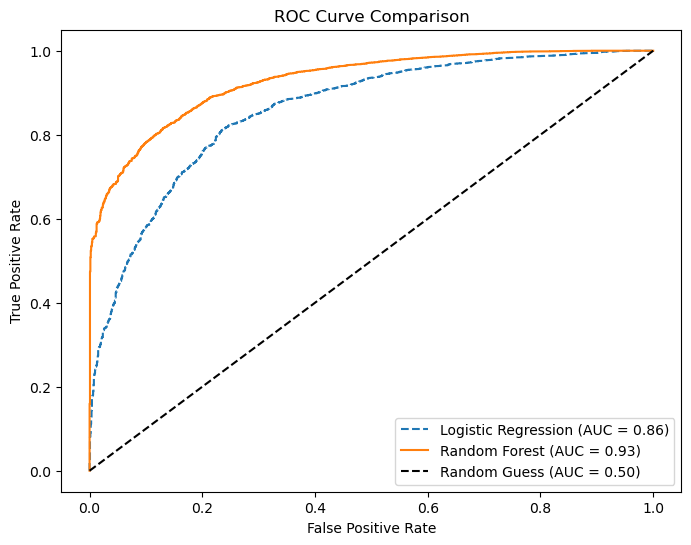

In [835]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for both models
y_pred_proba_logreg=logreg_pipeline.predict_proba(X_test)[:,1]  # Probability of class 1
y_pred_proba_rf=rf_pipeline.predict_proba(X_test)[:,1]  # Probability of class 1

# Compute ROC curve
fpr_logreg, tpr_logreg, _=roc_curve(y_test, y_pred_proba_logreg)
fpr_rf, tpr_rf, _=roc_curve(y_test, y_pred_proba_rf)

auc_logreg=roc_auc_score(y_test, y_pred_proba_logreg)
auc_rf=roc_auc_score(y_test, y_pred_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f"Logistic Regression (AUC = {auc_logreg:.2f})", linestyle='--')
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.50)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

ROC Curve Comparison

Random Forest (AUC = 0.93): Best performance with strong separation between approved and denied loans.

Logistic Regression (AUC = 0.86): Performs well but slightly weaker in distinguishing classes.

Random Guess (AUC = 0.50): Baseline with no predictive power.

Conclusion: Random Forest is the superior model, achieving the highest AUC and making better loan approval predictions.
   


Confusion Matrix

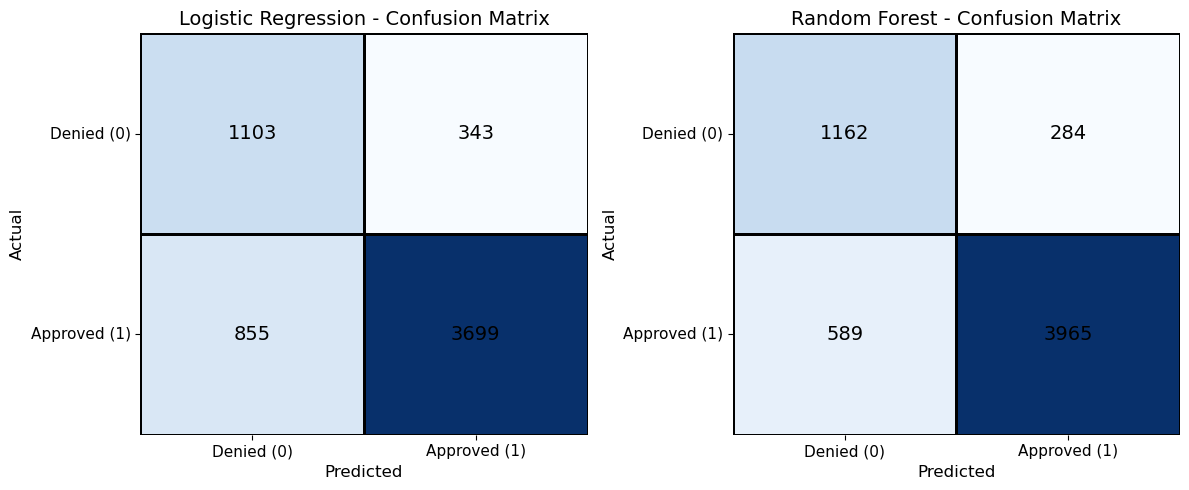

In [839]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Compute confusion matrices
logreg_cm = confusion_matrix(y_test, y_test_pred_logreg)
rf_cm = confusion_matrix(y_test, y_test_pred_rf)

def plot_confusion_matrix(ax, cm, title):
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False, linewidths=1, 
                linecolor="black", annot_kws={"size": 14, "color": "black"}, ax=ax)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel("Predicted", fontsize=12)
    ax.set_ylabel("Actual", fontsize=12)
    ax.set_xticklabels(["Denied (0)", "Approved (1)"], fontsize=11)
    ax.set_yticklabels(["Denied (0)", "Approved (1)"], fontsize=11, rotation=0)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_confusion_matrix(axes[0], logreg_cm, "Logistic Regression - Confusion Matrix")
plot_confusion_matrix(axes[1], rf_cm, "Random Forest - Confusion Matrix")

plt.tight_layout()
plt.show()

## Feature importance analysis 

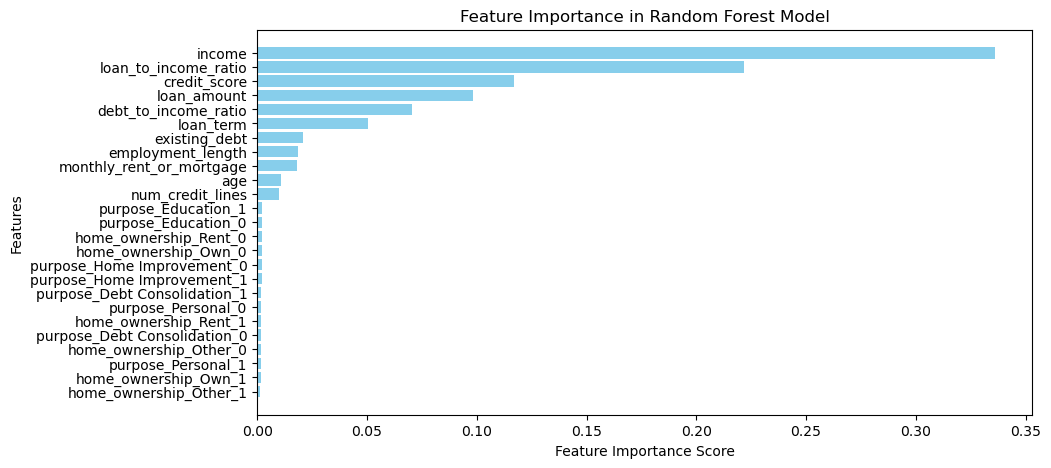

In [842]:
feature_names=numerical_vars + list(preprocessor.named_transformers_['cat'].get_feature_names_out())

# Extract feature importance from the trained Random Forest model
feature_importance=rf_pipeline.named_steps['classifier'].feature_importances_

# Create DataFrame for visualization
feature_importance_df=pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df=feature_importance_df.sort_values(by="Importance", ascending=False)


plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color="skyblue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

1) Top Influencers:

Income is the most significant factor in loan approval.

Loan-to-Income Ratio and Credit Score also play a crucial role.

2) Moderate Impact Features:

Debt-to-Income Ratio, Loan Amount, and Loan Term influence approval but to a lesser extent.

3) Least Impactful Features:

Categorical variables like Home Ownership and Purpose of Loan rank low, indicating minimal effect on approval.

Conclusion: The model heavily relies on income, credit score, and debt ratios, while categorical factors contribute less.  

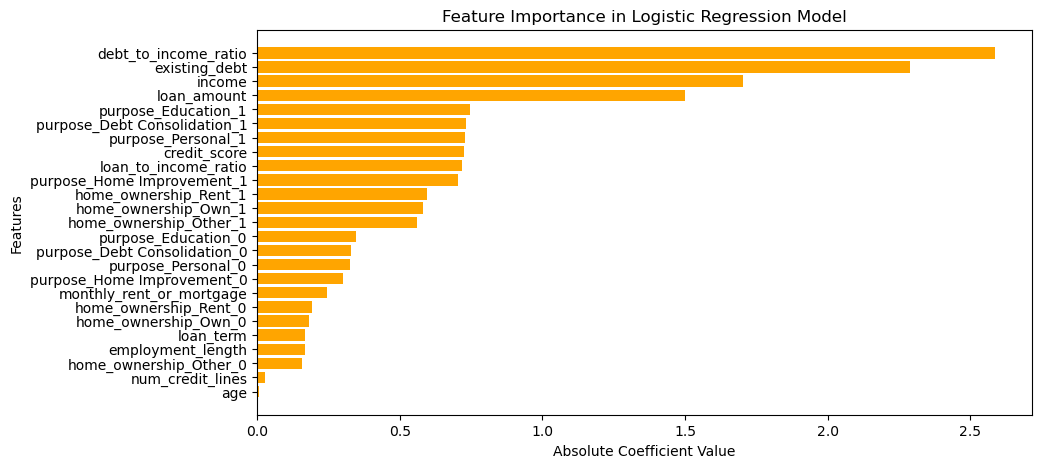

In [691]:
feature_names=numerical_vars + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_vars))


logreg_coefficients=logreg_pipeline.named_steps['classifier'].coef_[0]

# Create DataFrame for visualization
logreg_importance_df=pd.DataFrame({'Feature': feature_names, 'Coefficient': logreg_coefficients})
logreg_importance_df["Absolute Coefficient"] = logreg_importance_df["Coefficient"].abs()
logreg_importance_df=logreg_importance_df.sort_values(by="Absolute Coefficient", ascending=False)


plt.figure(figsize=(10, 5))
plt.barh(logreg_importance_df["Feature"], logreg_importance_df["Absolute Coefficient"], color="orange")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Features")
plt.title("Feature Importance in Logistic Regression Model")
plt.gca().invert_yaxis()
plt.show()

1) Debt-to-Income Ratio & Existing Debt: Strongest predictors, indicating higher debt reduces loan approval chances.

2) Income & Loan Amount: Higher income improves approval chances, while larger loans have a mixed impact.

3) Loan Purpose & Home Ownership: Certain loan purposes (Education, Debt Consolidation) slightly increase approval likelihood.

4) Credit Score & Loan Term: Higher credit scores contribute positively, while loan term has minimal impact.

Conclusion: Debt-to-income ratio and existing debt are the most influential factors in loan approval.

## K-Fold Cross-Validation

In [695]:
from sklearn.model_selection import cross_val_score

# Perform 5-Fold Cross-Validation for Random Forest
cv_scores_rf = cross_val_score(rf_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f"Random Forest Cross-Validation Accuracy: {cv_scores_rf.mean():.4f} ± {cv_scores_rf.std():.4f}")

cv_scores_lr = cross_val_score(logreg_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f"Logistic Regression Cross-Validation Accuracy: {cv_scores_lr.mean():.4f} ± {cv_scores_lr.std():.4f}")

Random Forest Cross-Validation Accuracy: 0.8774 ± 0.0038
Logistic Regression Cross-Validation Accuracy: 0.8437 ± 0.0026


What This Does:

Uses 5-Fold Cross-Validation to test the models on different data splits.

Prints the mean accuracy & standard deviation, showing how stable the model is.

## Hyperparameter Tuning Using GridSearchCV


In [698]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for Random Forest
rf_params = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=3, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

print("Best Parameters for Random Forest:", rf_grid.best_params_)

lr_params = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__solver': ['liblinear', 'lbfgs']
}

lr_grid = GridSearchCV(logreg_pipeline, lr_params, cv=3, scoring='accuracy', n_jobs=-1)
lr_grid.fit(X_train, y_train)

print("Best Parameters for Logistic Regression:", lr_grid.best_params_)

Best Parameters for Random Forest: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}
Best Parameters for Logistic Regression: {'classifier__C': 0.1, 'classifier__solver': 'lbfgs'}


What This Does:

Random Forest: Tests different number of trees (n_estimators), depth, and min_samples_split to find the best setting.

Logistic Regression: Tests regularization strength (C) and solvers to improve performance.

Uses GridSearchCV - Automatically finds the best combination.



## Train Models with Best Parameters


In [701]:
# Train optimized Random Forest
best_rf_pipeline = rf_grid.best_estimator_
best_rf_pipeline.fit(X_train, y_train)

# Train optimized Logistic Regression
best_lr_pipeline = lr_grid.best_estimator_
best_lr_pipeline.fit(X_train, y_train)

rf_tuned_acc = best_rf_pipeline.score(X_test, y_test)
lr_tuned_acc = best_lr_pipeline.score(X_test, y_test)

print(f"Tuned Random Forest Accuracy: {rf_tuned_acc:.4f}")
print(f"Tuned Logistic Regression Accuracy: {lr_tuned_acc:.4f}")

Tuned Random Forest Accuracy: 0.8793
Tuned Logistic Regression Accuracy: 0.8452


## Conclusion 

1) The goal of this project was to predict loan approval using machine learning techniques.
2) Exploratory Data Analysis (EDA) revealed key patterns in income, credit score, loan amount, and existing debt as major factors influencing loan approval.
3) Feature engineering, including new feature creation and handling outliers, improved model performance.
4) Random Forest outperformed Logistic Regression with higher accuracy, precision, and recall.
5) Hyperparameter tuning further optimized the model’s predictive power.
6) The ROC curve comparison confirmed that Random Forest is a superior choice for loan approval prediction.
7) Future improvements could include incorporating additional financial history features and testing deep learning approaches for enhanced accuracy.
